In [1]:
#Imports
import pandas as pd
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Fit models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
#Read data
data=pd.read_csv("C:\\Users\\user\\Downloads\\churn_1.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#As there is no data description provided some asumptions :
'''
The customer is churining the product but not bank , that explains why even when cutomer has exited he/she is showing as active
and has balance
'''

'\nThe customer is churining the product but not bank , that explains why even when cutomer has exited he/she is showing as active\nand has balance\n'

In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# No nulls
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
#We will not be performing EDA on RowNumber,CustomerId,Surname as they are customer specific and cannot add any value to model
#We will not be performing the eda basis of Gender
for i in data.columns:
    print(data[i].value_counts())

1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: RowNumber, Length: 10000, dtype: int64
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Lengt

In [6]:
cat_cols=['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','Exited']
num_cols=['CreditScore','Tenure','Age','Balance','EstimatedSalary']

In [7]:
#change the data type for categorical columns
data[cat_cols]=data[cat_cols].astype("object")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  object 
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 1.1+ MB


In [8]:
#sliciing the data for important columns
df=data[num_cols+cat_cols]
df.head()

,CreditScore,Tenure,Age,Balance,EstimatedSalary,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,2,42,0.00,101348.88,France,Female,1,1,1,1
1,608,1,41,83807.86,112542.58,Spain,Female,1,0,1,0
2,502,8,42,159660.80,113931.57,France,Female,3,1,0,1
3,699,1,39,0.00,93826.63,France,Female,2,0,0,0
4,850,2,43,125510.82,79084.10,Spain,Female,1,1,1,0


## EDA

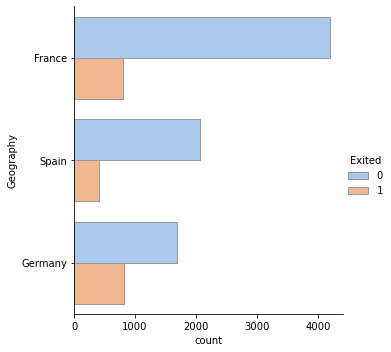

In [13]:
sns.catplot(y="Geography", hue="Exited", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

#### Looks like most of the data is beloning to France , but if we look closely we can see that Germany has higher rate of customer churn , so may be we can do some due deligence in imporving the service there.

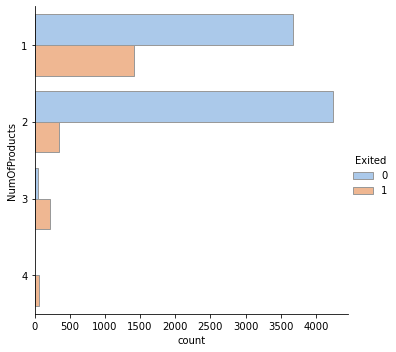

In [14]:
sns.catplot(y="NumOfProducts", hue="Exited", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

#### For some reason it looks like if customers by more number of products they are more likely to chrun


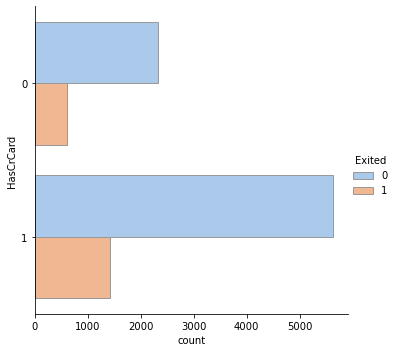

In [15]:
sns.catplot(y="HasCrCard", hue="Exited", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

In [16]:
len(data[(data['HasCrCard']==0) &(data['Exited']==1)])/len(data[(data['HasCrCard']==0) &(data['Exited']==0)])

0.26286449399656947

In [17]:
len(data[(data['HasCrCard']==1) &(data['Exited']==1)])/len(data[(data['HasCrCard']==1) &(data['Exited']==0)])

0.25288581069081867

#### Ratio of people with credit card and without credit card churing looks same  , but there are more people that has cards and not exited 

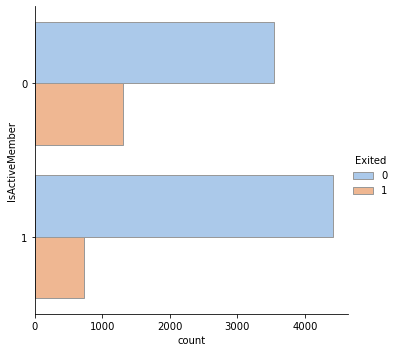

In [18]:
sns.catplot(y="IsActiveMember", hue="Exited", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

In [19]:
#### 
len(data[(data['IsActiveMember']==0) &(data['Exited']==1)])/len(data[(data['IsActiveMember']==0) &(data['Exited']==0)])

0.3670707640259374

In [20]:
len(data[(data['IsActiveMember']==1) &(data['Exited']==1)])/len(data[(data['IsActiveMember']==1) &(data['Exited']==0)])

0.16644021739130435

#### Inavtive members exited more

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

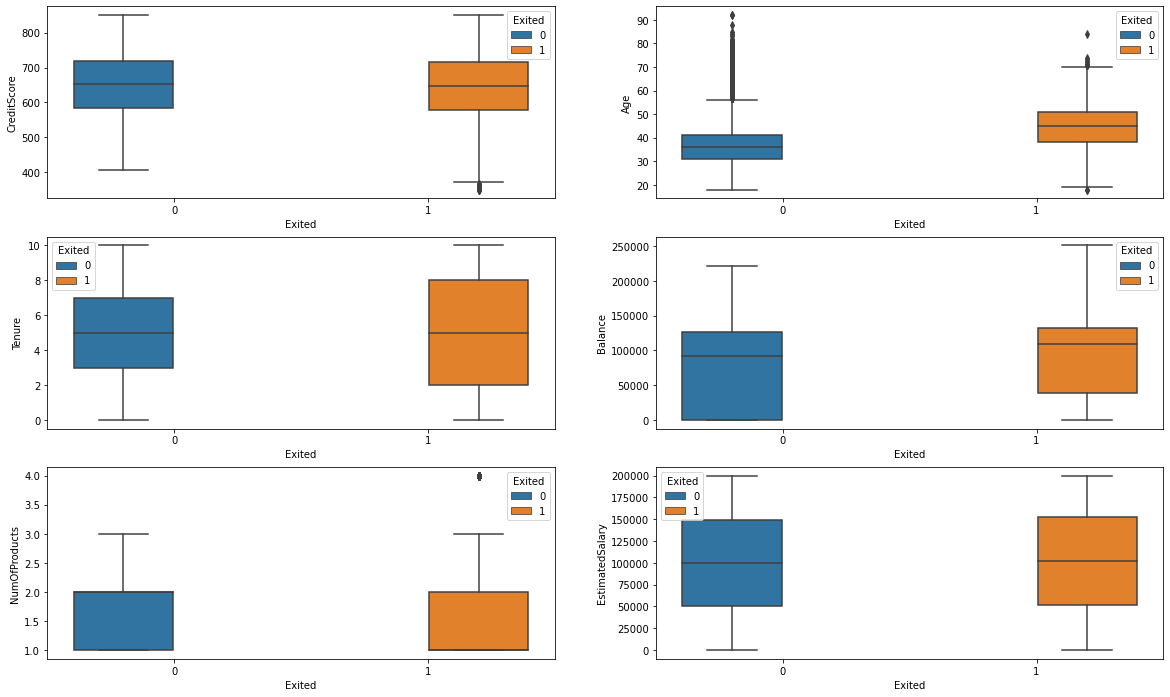

In [21]:
 # Relations based on the numeric data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

#### Observations

There is no significant difference in the credit score distribution between retained and churned customers.
The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
Neither the product nor the salary has a significant effect on the likelihood to churn.

In [9]:
# Split Train, test data
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


In [10]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
df_train['EstimatedSalaryAgeRatio'] = df_train.EstimatedSalary/df_train.Age
df_train['CreditScoreAgeRatio'] = df_train.CreditScore/df_train.Age
df_train['TenureAgeRatio'] = df_train.Tenure/df_train.Age
df_train['NumOfProductsAgeRatio'] = df_train.NumOfProducts/df_train.Age

In [11]:
df_train.head()

,CreditScore,Tenure,Age,Balance,EstimatedSalary,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Exited,BalanceSalaryRatio,EstimatedSalaryAgeRatio,CreditScoreAgeRatio,TenureAgeRatio,NumOfProductsAgeRatio
8159,461,6,25,0.00,15306.29,Spain,Female,2,1,1,0,0.000000,612.251600,18.440000,0.240000,0.08
6332,619,4,35,90413.12,20555.21,France,Female,1,1,1,0,4.398550,587.291714,17.685714,0.114286,0.028571
8895,699,8,40,122038.34,102085.35,France,Female,1,1,0,0,1.195454,2552.133750,17.475000,0.200000,0.025
5351,558,2,41,124227.14,111184.67,Germany,Male,1,1,1,0,1.117305,2711.821220,13.609756,0.048780,0.02439
4314,638,5,34,133501.36,155643.04,France,Male,1,0,1,0,0.857741,4577.736471,18.764706,0.147059,0.029412


In [12]:
one_hot_encoded_data = pd.get_dummies(df_train, columns = ['Geography','Gender'], drop_first=True)
#print(one_hot_encoded_data)

In [13]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
train_data = scaler.fit_transform(one_hot_encoded_data)
train = pd.DataFrame(train_data,columns=one_hot_encoded_data.columns)

In [14]:
def transform(test_data):
    df_test['BalanceSalaryRatio'] = df_test.Balance/df_test.EstimatedSalary
    df_test['EstimatedSalaryAgeRatio'] = df_test.EstimatedSalary/df_test.Age
    df_test['CreditScoreAgeRatio'] = df_test.CreditScore/df_test.Age
    df_test['TenureAgeRatio'] = df_test.Tenure/df_test.Age
    df_test['NumOfProductsAgeRatio'] = df_test.NumOfProducts/df_test.Age
    one_hot_encoded_test_data = pd.get_dummies(df_test, columns = ['Geography','Gender'], drop_first=True)
    # define min max scaler
    scaler = MinMaxScaler()
    # transform data
    test_data = scaler.fit_transform(one_hot_encoded_test_data)
    test = pd.DataFrame(test_data,columns=one_hot_encoded_test_data.columns)
    return test

In [15]:
test = transform(df_test)

In [16]:
test

,CreditScore,Tenure,Age,Balance,EstimatedSalary,NumOfProducts,HasCrCard,IsActiveMember,Exited,BalanceSalaryRatio,EstimatedSalaryAgeRatio,CreditScoreAgeRatio,TenureAgeRatio,NumOfProductsAgeRatio,Geography_Germany,Geography_Spain,Gender_Male
0,0.270440,0.8,0.324324,0.750363,0.570039,0.666667,1.0,0.0,1.0,0.000132,0.274565,0.135061,0.400000,0.482565,0.0,0.0,0.0
1,0.683438,0.1,0.283784,0.000000,0.469437,0.333333,0.0,0.0,0.0,0.000000,0.243505,0.292387,0.053846,0.322027,0.0,0.0,0.0
2,0.570231,0.8,0.351351,0.534621,0.749303,0.333333,1.0,0.0,1.0,0.000072,0.344503,0.206382,0.381818,0.275591,0.0,1.0,1.0
3,0.368973,0.9,0.081081,0.000000,0.072030,0.333333,1.0,1.0,0.0,0.000000,0.060737,0.422869,0.787500,0.577428,0.0,1.0,0.0
4,0.448637,0.6,0.364865,0.000000,0.793978,0.000000,0.0,0.0,0.0,0.000000,0.356930,0.163837,0.280000,0.090464,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.549266,0.8,0.378378,0.000000,0.303872,0.333333,1.0,1.0,0.0,0.000000,0.133634,0.183860,0.365217,0.259843,0.0,1.0,1.0
1996,0.524109,0.5,0.405405,0.556774,0.793505,0.000000,1.0,1.0,0.0,0.000070,0.334421,0.162116,0.218750,0.079396,0.0,0.0,1.0
1997,0.494759,0.6,0.310811,0.000000,0.563302,0.000000,0.0,1.0,0.0,0.000000,0.277939,0.211509,0.307317,0.107740,0.0,0.0,1.0
1998,0.498952,0.7,0.121622,0.000000,0.787920,0.333333,1.0,1.0,0.0,0.000000,0.590362,0.416403,0.544444,0.503645,0.0,0.0,1.0


In [19]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(train.loc[:, train.columns != 'Exited'], train.Exited)

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from  sklearn.tree import DecisionTreeClassifier
# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [25]:
# Decision Tree
param_grid = {'max_depth': [5,6,7,8],
             'min_weight_fraction_leaf':[0, 0.2, 0.3, 0.5]}
dtree_grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, refit=True, verbose=0)
dtree_model_s=dtree_grid.fit(X,y)
#best_model(RanFor_grid)

In [27]:
print("Train")
print(classification_report(train.Exited, dtree_model_s.predict(train.loc[:, train.columns != 'Exited'])))
print("Test")
print(classification_report(test.Exited,  dtree_model_s.predict(test.loc[:, test.columns != 'Exited'])))

Train
              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87      6353
         1.0       0.53      0.77      0.63      1647

    accuracy                           0.81      8000
   macro avg       0.73      0.80      0.75      8000
weighted avg       0.85      0.81      0.82      8000

Test
              precision    recall  f1-score   support

         0.0       0.91      0.68      0.78      1610
         1.0       0.36      0.74      0.48       390

    accuracy                           0.69      2000
   macro avg       0.64      0.71      0.63      2000
weighted avg       0.81      0.69      0.72      2000



In [32]:
#Random Forest Model

param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RF_model_s=RanFor_grid.fit(X,y)
#best_model(RanFor_grid)

In [32]:
rf_pred=RF_model_s.predict(test.loc[:, test.columns != 'Exited'])

In [40]:
print("Train")
print(classification_report(train.Exited, RF_model_s.predict(train.loc[:, train.columns != 'Exited'])))
print("Test")
print(classification_report(test.Exited,  RF_model_s.predict(test.loc[:, test.columns != 'Exited'])))

Train
              precision    recall  f1-score   support

         0.0       0.93      0.88      0.91      6353
         1.0       0.63      0.74      0.68      1647

    accuracy                           0.86      8000
   macro avg       0.78      0.81      0.79      8000
weighted avg       0.87      0.86      0.86      8000

Test
              precision    recall  f1-score   support

         0.0       0.92      0.76      0.83      1610
         1.0       0.43      0.74      0.54       390

    accuracy                           0.76      2000
   macro avg       0.67      0.75      0.69      2000
weighted avg       0.83      0.76      0.78      2000



In [34]:
#Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_model_s=xgb_grid.fit(X,y)

In [55]:
xgb_pred=xgb_model_s.predict(test.loc[:, test.columns != 'Exited'])

In [36]:
print("Train")
print(classification_report(train.Exited, xgb_model_s.predict(train.loc[:, train.columns != 'Exited'])))
print("Test")
print(classification_report(test.Exited,  xgb_model_s.predict(test.loc[:, test.columns != 'Exited'])))

Train
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      6353
         1.0       0.97      0.91      0.94      1647

    accuracy                           0.98      8000
   macro avg       0.98      0.95      0.96      8000
weighted avg       0.98      0.98      0.98      8000

Test
              precision    recall  f1-score   support

         0.0       0.91      0.79      0.85      1610
         1.0       0.44      0.67      0.53       390

    accuracy                           0.77      2000
   macro avg       0.67      0.73      0.69      2000
weighted avg       0.82      0.77      0.79      2000



In [ ]:
'''We will select Random Forest as final model
We are looking a Recall as a metric , reason- asumption: We shold be okay with some false positive, as this is a customer churn
and even if we mark some false positive that should be okay. Also as this is a imbalance dataset we cannot use accuracy as a measure
As per below code , we can see that we also get AUC of 0.74 which looks decent.

In [42]:
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

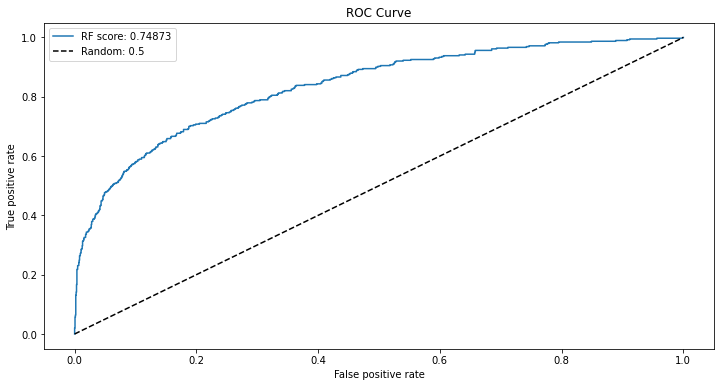

In [44]:
auc_RF_test, fpr_RF_test, tpr_RF_test = get_auc_scores(test.Exited, RF_model_s.predict(test.loc[:, test.columns != 'Exited']),
                                                       RF_model_s.predict_proba(test.loc[:, test.columns != 'Exited'])[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_RF_test, tpr_RF_test, label = 'RF score: ' + str(round(auc_RF_test, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()